In [1]:
import os
import sys
import base64
from io import BytesIO

import numpy as np
from PIL import Image

sys.path.append("..")
from dash_reusable_components import *

# Displays images smaller
def display(im, new_width=400):
    ratio = new_width / im.size[0]
    new_height = round(im.size[1] * ratio)
    return im.resize((new_width, new_height))

## Testing PIL vs b64

In [ ]:
image_path = "../images/IU.jpg"

im = Image.open(image_path)
print("Shape of Image:", im.size)
print("Size of Image:", os.stat(image_path).st_size, "bytes")
display(im)

### Encoding

In [66]:
enc_png = pil_to_b64(im)
print("PNG results:")
print("Length of string:", len(enc_png))
print("Size of string:", sys.getsizeof(enc_png), "bytes")
print("Time taken to convert from PIL to b64:")
%timeit pil_to_b64(im)

enc_jpg = pil_to_b64(im, enc_format='jpeg')
print("\nJPEG results:")
print("Length of string:", len(enc_jpg))
print("Size of string:", sys.getsizeof(enc_jpg), "bytes")
print("Time taken to convert from PIL to b64:")
%timeit pil_to_b64(im, enc_format='jpeg')

PNG results:
Length of string: 4421876
Size of string: 4421925 bytes
Time taken to convert from PIL to b64:
1.77 s ± 66.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

JPEG results:
Length of string: 483156
Size of string: 483205 bytes
Time taken to convert from PIL to b64:
229 ms ± 9.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Decoding

In [67]:
dec_png = b64_to_pil(enc_png)
print("PNG results:")
print("Time taken to convert from b64 to PIL:")
%timeit b64_to_pil(enc_png)

dec_jpg = b64_to_pil(enc_jpg)
print("\nJPEG results:")
print("Time taken to convert from b64 to PIL:")
%timeit b64_to_pil(enc_jpg)

PNG results:
Time taken to convert from b64 to PIL:
30.6 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

JPEG results:
Time taken to convert from b64 to PIL:
2.48 ms ± 98.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
decoded = b64_to_pil(enc_png)
display(decoded)

## Testing Numpy and b64

### Encoding

In [6]:
# Get numpy array from previous image
np_array = np.asarray(im)
print("Numpy array shape:", np_array.shape)
print("Numpy array size:", np_array.nbytes, "bytes")

enc_png = numpy_to_b64(im, scalar=False, enc_format='png')
print("\nPNG results:")
print("Length of string:", len(enc_png))
print("Size of string:", sys.getsizeof(enc_png), "bytes")
print("Time taken to convert from Numpy to b64:")
%timeit numpy_to_b64(im, scalar=False)

enc_jpg = numpy_to_b64(im, scalar=False, enc_format='jpeg')
print("\nJPEG results:")
print("Length of string:", len(enc_jpg))
print("Size of string:", sys.getsizeof(enc_jpg), "bytes")
print("Time taken to convert from Numpy to b64:")
%timeit numpy_to_b64(im, scalar=False, enc_format='jpeg')

Numpy array shape: (2412, 3356, 3)
Numpy array size: 24284016 bytes

PNG results:
Length of string: 4421876
Size of string: 4421925 bytes
Time taken to convert from Numpy to b64:
1.8 s ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

JPEG results:
Length of string: 483156
Size of string: 483205 bytes
Time taken to convert from Numpy to b64:
327 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Decoding

In [21]:
dec_png = b64_to_numpy(enc_png, to_scalar=False)
print("PNG results:")
print("Time taken to convert from b64 to Numpy:")
%timeit b64_to_numpy(enc_png)
print("Time taken to convert from b64 to Numpy (to_scalar false):")
%timeit b64_to_numpy(enc_png, to_scalar=False)


dec_jpg = b64_to_numpy(enc_jpg, to_scalar=False)
print("\nJPEG results:")
print("Time taken to convert from b64 to Numpy:")
%timeit b64_to_numpy(enc_jpg)
print("Time taken to convert from b64 to Numpy (to_scalar false):")
%timeit b64_to_numpy(enc_jpg, to_scalar=False)

PNG results:
Time taken to convert from b64 to Numpy:
524 ms ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken to convert from b64 to Numpy (to_scalar false):
339 ms ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

JPEG results:
Time taken to convert from b64 to Numpy:
365 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken to convert from b64 to Numpy (to_scalar false):
194 ms ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Testing PIL and Bytes Encoding/Decoding

In [11]:
print("Time taken to convert from PIL to bytes string:")
%timeit pil_to_bytes_string(im)

enc_b, im_size, mode = pil_to_bytes_string(im)

print("\nTime taken to convert from bytes string to PIL:")
%timeit bytes_string_to_pil(enc_b, im_size)

Time taken to convert from PIL to bytes string:
174 ms ± 5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Time taken to convert from bytes string to PIL:
180 ms ± 7.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Compare Matching for Jpeg and png encodings

dec_png and np_array are same: True
dec_jpg and np_array are same: False

Number of matching values: 16558598
Number of non-matching values: 7725418
68.19% matching vs 31.81% not matching


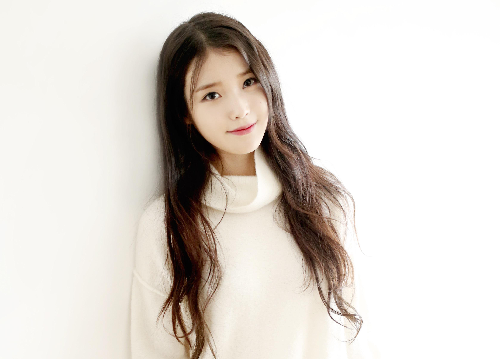

In [20]:
print("dec_png and np_array are same:", np.all(dec_png == np_array))
print("dec_jpg and np_array are same:", np.all(dec_jpg == np_array))

matching_count = np.count_nonzero(dec_jpg == np_array)
non_matching_count = np.count_nonzero(dec_jpg != np_array)
total = matching_count + non_matching_count

print("\nNumber of matching values:", matching_count)
print("Number of non-matching values:", non_matching_count)
print(f"{100 * matching_count / total:.2f}% matching vs {100 * non_matching_count / total:.2f}% not matching")

display(Image.fromarray(dec_jpg))

## Conversion speed at different dimensions

### PIL to b64

In [14]:
heights = [360, 480, 720, 1080, 2160]

for height in heights:
    width = round(height * 16 / 9)
    resized_im = im.resize((width, height))
    
    print(f"Size: {width}x{height}")
    print("Time taken to convert from PIL to b64 (png):")
    %timeit pil_to_b64(resized_im, enc_format='png')
    print("Time taken to convert from PIL to b64 (jpeg):")
    %timeit pil_to_b64(resized_im, enc_format='jpeg')
    print()

Size: 640x360
Time taken to convert from PIL to b64 (png):
46.5 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to convert from PIL to b64 (jpeg):
10.4 ms ± 553 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Size: 853x480
Time taken to convert from PIL to b64 (png):
82.8 ms ± 5.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to convert from PIL to b64 (jpeg):
17.5 ms ± 822 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Size: 1280x720
Time taken to convert from PIL to b64 (png):
194 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to convert from PIL to b64 (jpeg):
37 ms ± 961 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Size: 1920x1080
Time taken to convert from PIL to b64 (png):
386 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken to convert from PIL to b64 (jpeg):
81.3 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Size: 3840x2

### Numpy to b64

In [8]:
heights = [360, 480, 720, 1080, 2160]

for height in heights:
    width = round(height * 16 / 9)
    resized_im = im.resize((width, height))
    
    print(f"Size: {width}x{height}")
    print("Time taken to convert from numpy to b64 (png):")
    %timeit numpy_to_b64(resized_im, scalar=False)
    print("Time taken to convert from numpy to b64 (jpeg):")
    %timeit numpy_to_b64(resized_im, enc_format='jpeg', scalar=False)
    print()

Size: 640x360
Time taken to convert from numpy to b64 (png):
25.9 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to convert from numpy to b64 (jpeg):
8.23 ms ± 835 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Size: 853x480
Time taken to convert from numpy to b64 (png):
42.2 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to convert from numpy to b64 (jpeg):
13.1 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Size: 1280x720
Time taken to convert from numpy to b64 (png):
89.3 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to convert from numpy to b64 (jpeg):
28.6 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Size: 1920x1080
Time taken to convert from numpy to b64 (png):
192 ms ± 8.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken to convert from numpy to b64 (jpeg):
65.6 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops 

In [59]:
buff = BytesIO()
%timeit im.save(buff, format='png', compression_level=1)
%timeit encoded = base64.b64encode(buff.getvalue())

1.74 s ± 87.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
159 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Exploring Jpeg Compression

In [34]:
dec_jpg.filter(ImageFilter.BLUR).size

(3840, 2400)

In [51]:
from PIL import ImageFilter

im = Image.open('../images/cats.jpg')
np_array = np.asarray(im)

for x in range(1, 11):
    enc_jpg = pil_to_b64(im, enc_format='jpeg', quality=100)
    dec_jpg = b64_to_pil(enc_jpg)
    
    random = np.random.randint(0, 1500)
    # Apply some operation
    box = (random, random, random + 50,  random + 50)
    cropped = dec_jpg.filter(ImageFilter.BLUR).crop(box)
    dec_jpg.paste(cropped, box=box)
    
    dec_arr = np.asarray(dec_jpg)
    
    matching_count = np.count_nonzero(dec_arr == np_array)
    non_matching_count = np.count_nonzero(dec_arr != np_array)
    total = matching_count + non_matching_count

    print(f"\nNumber of matching values after {x} compressions: {matching_count}")
    print("Number of non-matching values:", non_matching_count)
    print(f"{100 * matching_count / total:.2f}% matching vs {100 * non_matching_count / total:.2f}% not matching")


Number of matching values after 1 compressions: 25203871
Number of non-matching values: 2444129
91.16% matching vs 8.84% not matching

Number of matching values after 2 compressions: 25205485
Number of non-matching values: 2442515
91.17% matching vs 8.83% not matching

Number of matching values after 3 compressions: 25204402
Number of non-matching values: 2443598
91.16% matching vs 8.84% not matching

Number of matching values after 4 compressions: 25203833
Number of non-matching values: 2444167
91.16% matching vs 8.84% not matching

Number of matching values after 5 compressions: 25205239
Number of non-matching values: 2442761
91.16% matching vs 8.84% not matching

Number of matching values after 6 compressions: 25205300
Number of non-matching values: 2442700
91.17% matching vs 8.83% not matching

Number of matching values after 7 compressions: 25205480
Number of non-matching values: 2442520
91.17% matching vs 8.83% not matching

Number of matching values after 8 compressions: 252025

### Exploring Lossless jpeg compression (jpeg 2000)

In [44]:
def pil_to_b64(im, enc_format='png', verbose=False, **kwargs):
    """
    Converts a PIL Image into base64 string for HTML displaying
    :param im: PIL Image object
    :param enc_format: The image format for displaying. If saved the image will have that extension.
    :return: base64 encoding
    """
    t_start = time.time()

    buff = BytesIO()
    im.save(buff, format=enc_format, **kwargs)
    encoded = base64.b64encode(buff.getvalue()).decode("utf-8")

    t_end = time.time()
    if verbose:
        print(f"PIL converted to b64 in {t_end - t_start:.3f} sec")

    return encoded

In [65]:
%timeit pil_to_b64(im, enc_format='png')

2.98 s ± 78.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%timeit pil_to_b64(im, enc_format='jpeg2000')

4.94 s ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
%timeit pil_to_b64(im, enc_format='jpeg')

363 ms ± 8.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exploring Jpeg compression Sizes

In [54]:
%timeit pil_to_b64(im, enc_format='jpeg', quality=100)
%timeit pil_to_b64(im, enc_format='jpeg', quality=95)

439 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
415 ms ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
im = Image.open('../images/cats.jpg')
print(len(pil_to_b64(im, enc_format='jpeg', quality=90)))
print(len(pil_to_b64(im, enc_format='jpeg', quality=95)))
print(len(pil_to_b64(im, enc_format='jpeg', quality=100)))

2907508
3899648
6331048


## Supplementary Exploration

In [ ]:
import pandas as pd
im = Image.open('../images/IU2.jpg')
arr = np.asarray(im)

print(arr.size)

%timeit im.getdata()
%timeit pil_to_b64(im)
%timeit Image.fromarray(arr)

In [ ]:
barr = arr.tobytes()
back = np.frombuffer(barr, dtype=np.uint8).reshape(arr.shape)
display(Image.fromarray(back))

In [51]:
%timeit barr = np.asarray(im).tobytes()
%timeit Image.fromarray(np.frombuffer(barr, dtype=np.uint8).reshape(arr.shape))

49.8 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.7 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%timeit imgSize = im.size
%timeit rawData = im.tobytes()
%timeit Image.frombytes('RGB', imgSize, rawData)

52.7 ns ± 0.971 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
32.4 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.4 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
im = Image.open('../images/IU2.jpg')
imgSize = im.size
imb = im.tobytes()
enc_str = base64.b64encode(imb).decode('ascii')

dec = base64.b64decode(enc_str.encode('ascii'))
display(Image.frombytes('RGB', imgSize, dec))

In [ ]:
im = Image.open('../images/IU2.jpg')
arr = np.asarray(im)
arrb = arr.tobytes()
enc_str = base64.b64encode(barr).decode('ascii')
imgSize = arr.shape

dec = base64.b64decode(enc_str.encode('ascii'))
retrieved_arr = np.frombuffer(barr, dtype=np.uint8).reshape(imgSize)

im_retrieved = Image.fromarray(retrieved_arr)
print(type(im_retrieved))
display(im_retrieved)

In [8]:
%timeit pil_to_b64(im, enc_format='bmp')
string = pil_to_b64(im, enc_format='bmp')
%timeit b64_to_pil(string)

311 ms ± 37.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
156 ms ± 7.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
# Image utility functions
def pil_to_b64_png(im, verbose=False, comp=6):
    """
    Converts a PIL Image into base64 string for HTML displaying
    :param im: PIL Image object
    :param enc_format: The image format for displaying. If saved the image will have that extension.
    :return: base64 encoding
    """
    t_start = time.time()

    buff = BytesIO()
    im.save(buff, format='png', compress_level=comp)
    encoded = base64.b64encode(buff.getvalue()).decode("utf-8")

    t_end = time.time()
    if verbose:
        print(f"PIL converted to b64 in {t_end - t_start:.3f} sec")

    return encoded

%timeit pil_to_b64_png(im, comp=1)
string = pil_to_b64_png(im, comp=1)
%timeit b64_to_pil(string)

609 ms ± 7.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.7 ms ± 602 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
def func(im):
    buff = BytesIO()
    im.save(buff, format='png', compress_level=1)
    
%timeit func(im)

585 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
